# Муравьиный алгоритм для решения задачи коммивояжёра

In [3]:
import os
from numpy.ma.core import count
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import spatial
from sklearn import preprocessing

In [23]:
class ACO_TSP:  # класс алгоритма муравьиной колонии для решения задачи коммивояжёра
    def __init__(self, func, n_dim, size_pop=10, max_iter=20, distance_matrix=None, alpha=4, beta=1, rho=0.1):
        self.func = func
        self.n_dim = n_dim  # количество городов
        self.size_pop = size_pop  # количество муравьёв
        self.max_iter = max_iter  # количество итераций
        self.alpha = alpha  # коэффициент важности феромонов в выборе пути
        self.beta = beta  # коэффициент значимости расстояния
        self.rho = rho  # скорость испарения феромонов

        self.prob_matrix_distance = 1 / (distance_matrix + 1e-10 * np.eye(n_dim, n_dim))

        # Матрица феромонов, обновляющаяся каждую итерацию
        self.Tau = np.ones((n_dim, n_dim))
        # Путь каждого муравья в определённом поколении
        self.Table = np.zeros((size_pop, n_dim)).astype(int)
        self.y = None  # Общее расстояние пути муравья в определённом поколении
        self.generation_best_X, self.generation_best_Y = [], [] # фиксирование лучших поколений
        self.x_best_history, self.y_best_history = self.generation_best_X, self.generation_best_Y
        self.best_x, self.best_y = None, None

    def run(self, max_iter=None):
        self.max_iter = max_iter or self.max_iter
        for i in range(self.max_iter):
            # вероятность перехода без нормализации
            prob_matrix = (self.Tau ** self.alpha) * (self.prob_matrix_distance) ** self.beta
            for j in range(self.size_pop):  # для каждого муравья
                # точка начала пути (она может быть случайной, это не имеет значения)
                self.Table[j, 0] = 0
                for k in range(self.n_dim - 1):  # каждая вершина, которую проходят муравьи
                    # точка, которая была пройдена и не может быть пройдена повторно
                    taboo_set = set(self.Table[j, :k + 1])
                    # список разрешённых вершин, из которых будет происходить выбор
                    allow_list = list(set(range(self.n_dim)) - taboo_set)
                    prob = prob_matrix[self.Table[j, k], allow_list]
                    prob = prob / prob.sum() # нормализация вероятности
                    next_point = np.random.choice(allow_list, size=1, p=prob)[0]
                    self.Table[j, k + 1] = next_point

            # рассчёт расстояния
            y = np.array([self.func(i) for i in self.Table])

            # фиксация лучшего решения
            index_best = y.argmin()
            x_best, y_best = self.Table[index_best, :].copy(), y[index_best].copy()
            self.generation_best_X.append(x_best)
            self.generation_best_Y.append(y_best)
            best_generation = np.array(self.generation_best_Y).argmin()
            self.best_x = self.generation_best_X[best_generation]
            self.best_y = self.generation_best_Y[best_generation]

            # подсчёт феромона, который будет добавлен к ребру
            delta_tau = np.zeros((self.n_dim, self.n_dim))
            for j in range(self.size_pop):  # для каждого муравья
                for k in range(self.n_dim - 1):  # для каждой вершины
                    # муравьи перебираются из вершины n1 в вершину n2
                    n1, n2 = self.Table[j, k], self.Table[j, k + 1]
                    delta_tau[n1, n2] += 1 / y[j]  # нанесение феромона
                # муравьи ползут от последней вершины обратно к первой
                n1, n2 = self.Table[j, self.n_dim - 1], self.Table[j, 0]
                delta_tau[n1, n2] += 1 / y[j]  # нанесение феромона

            self.Tau = (1 - self.rho) * self.Tau + delta_tau
            list_arr = self.best_x.tolist()

            print("\n\n Итерация №{}".format(i+1))
            print("Полученный путь: ", *list_arr, list_arr[0], sep="-")
            print("Стоимость: {}".format(self.best_y))
            print(y)

            fig, axes = plt.subplots(1, 2)
            best_points_ = np.concatenate([self.best_x, [self.best_x[0]]])
            best_points_coordinate = points_coordinate[best_points_, :]
            for index in range(0, len(best_points_)):
                axes[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
            axes[0].plot(best_points_coordinate[:, 0],
                       best_points_coordinate[:, 1], 'o-r')
            pd.DataFrame(self.y_best_history).cummin().plot(ax=axes[1])
            axes[0].set_title("Вершины на координатной плоскости", fontsize = 24)
            axes[1].set_title('График поиска минимума', fontsize = 24)
            fig.set_facecolor('floralwhite')
            axes[0].set_xlabel('X', fontsize = 16)
            axes[0].set_ylabel('Y', fontsize = 16)
            axes[0].grid(which="major", axis='both', alpha=.3)
            axes[1].grid(which="major", axis='both', alpha=.3)
            axes[1].set_xlabel('Количество итераций', fontsize = 16)
            axes[1].set_ylabel('Пройденный путь', fontsize = 16)

            # изменение размера графиков
            plt.rcParams['figure.figsize'] = [30, 10]
            plt.show()

    fit = run



Выберите способ ввода данных:
1)Ввод с клавиатуры.
2)Случайная генерация
3)Считывание из CSV-файла координатных точек
2
Сгенерировано 35 вершин.
Координаты вершин:
 [[90  2]
 [53 45]
 [14 12]
 [39  6]
 [12 19]
 [57 78]
 [95 33]
 [79 73]
 [91 37]
 [27 64]
 [37 33]
 [78 57]
 [61 79]
 [89 77]
 [82 40]
 [59 81]
 [76  9]
 [16 70]
 [33 84]
 [19 22]
 [31 25]
 [28 73]
 [70 58]
 [92 31]
 [62 27]
 [ 5 32]
 [46 18]
 [79 12]
 [81 15]
 [52 99]
 [50 23]
 [91 40]
 [77 84]
 [39 79]
 [86 49]]
Матрица весовых коэффициентов:
              0          1          2          3          4          5   \
0     0.000000  56.727418  76.655072  51.156622  79.831072  82.855296   
1    56.727418   0.000000  51.088159  41.436699  48.548944  33.241540   
2    76.655072  51.088159   0.000000  25.709920   7.280110  78.771822   
3    51.156622  41.436699  25.709920   0.000000  29.966648  74.215901   
4    79.831072  48.548944   7.280110  29.966648   0.000000  74.202426   
5    82.855296  33.241540  78.771822  74.215901 

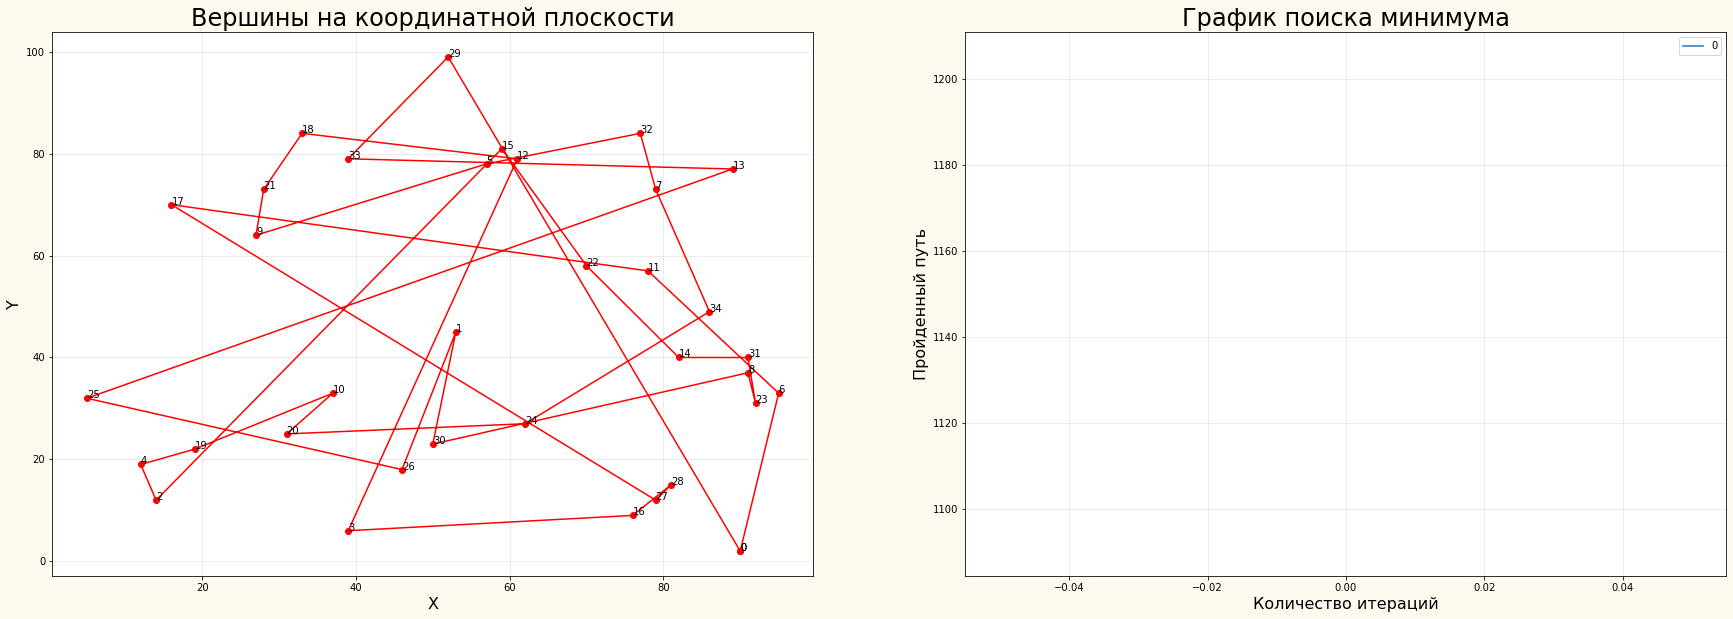



 Итерация №2
Полученный путь: -0-6-11-17-27-28-16-3-12-18-21-9-5-32-7-34-24-20-10-19-4-2-15-22-14-31-23-8-30-1-26-25-13-33-29-0
Стоимость: 1147.6885766450314
[1302.9539966  1403.71586857 1159.07537757 1609.58616021 1346.07795134]


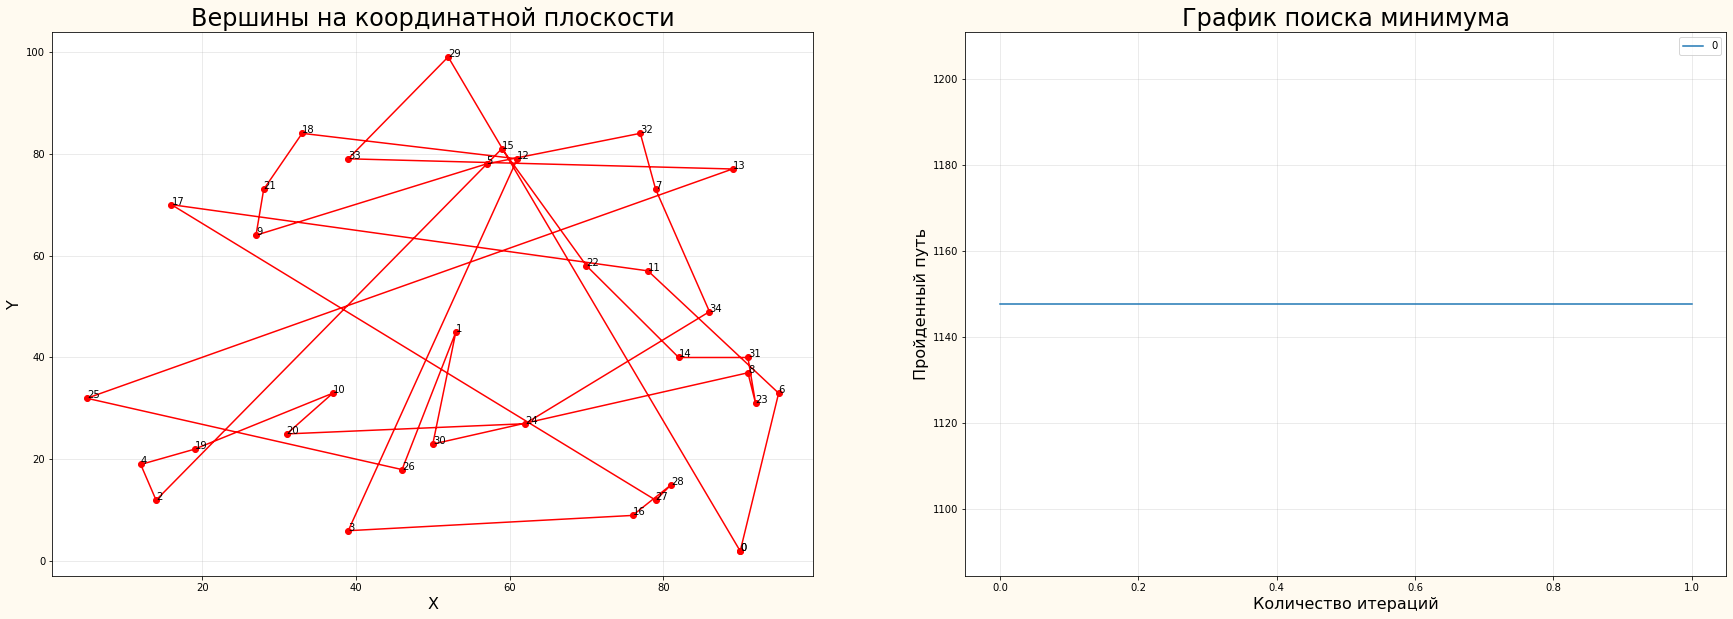



 Итерация №3
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1250.45057125 1306.04556731 1653.6075511  1272.04169399  949.63464146]


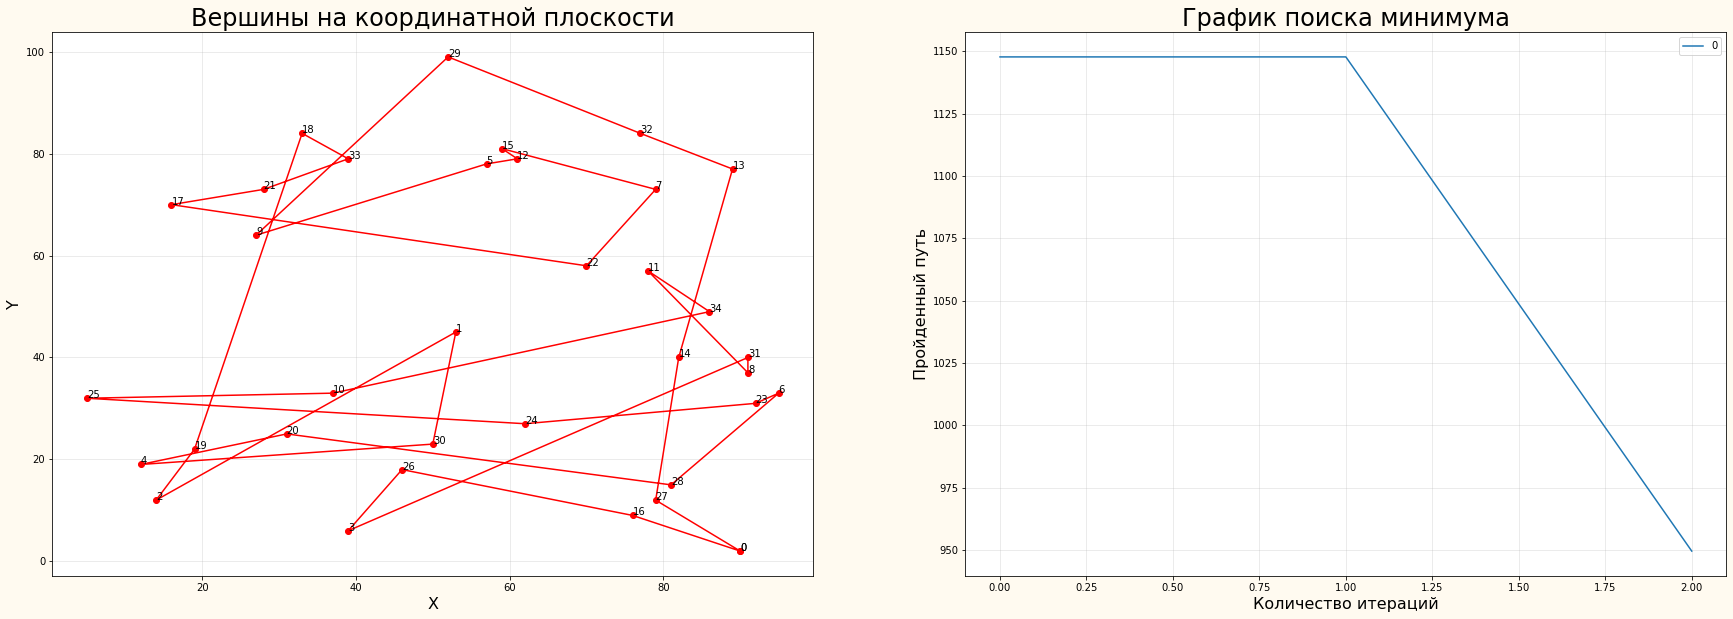



 Итерация №4
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1301.3458741  1202.83721978 1424.94127207 1260.36659795 1146.35257013]


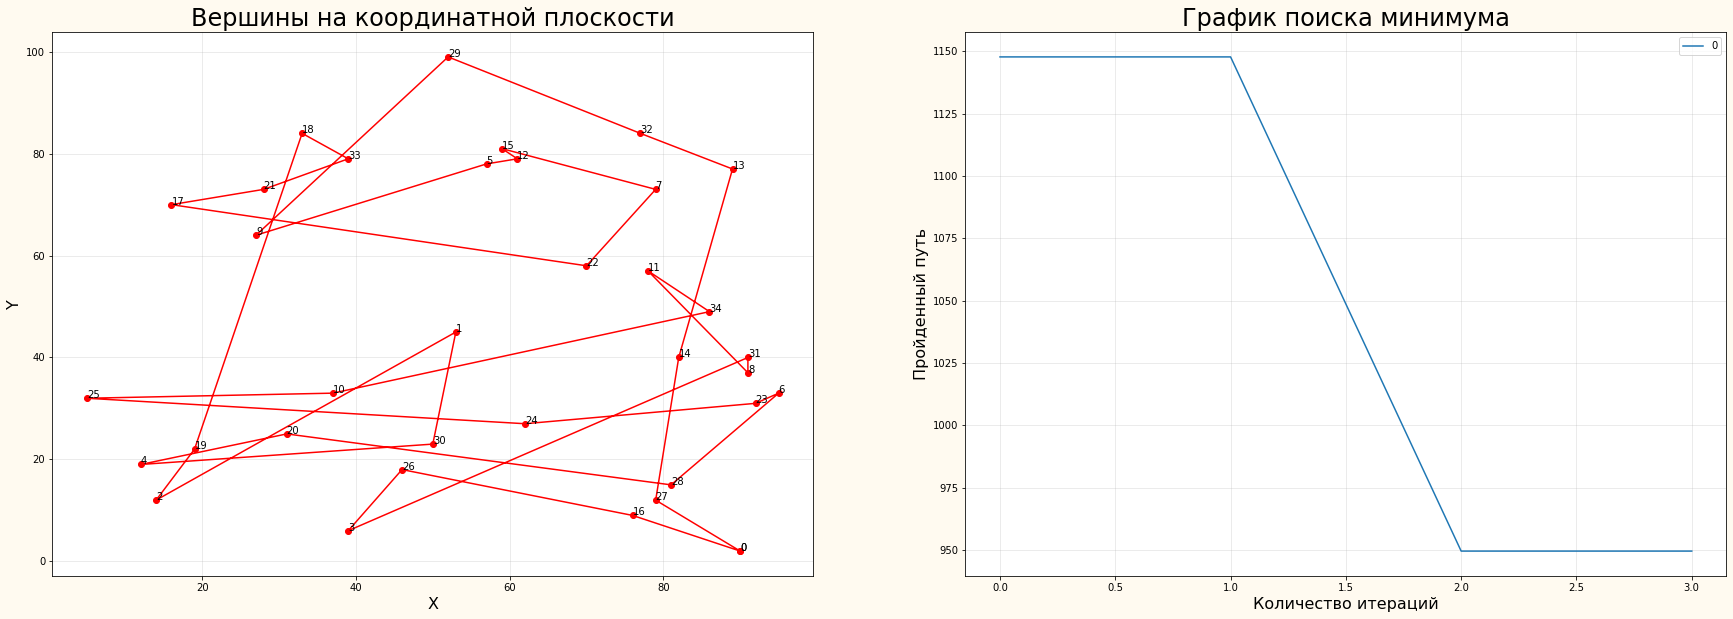



 Итерация №5
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1440.92202267 1110.65003916 1390.28999844 1180.02325812 1568.45445242]


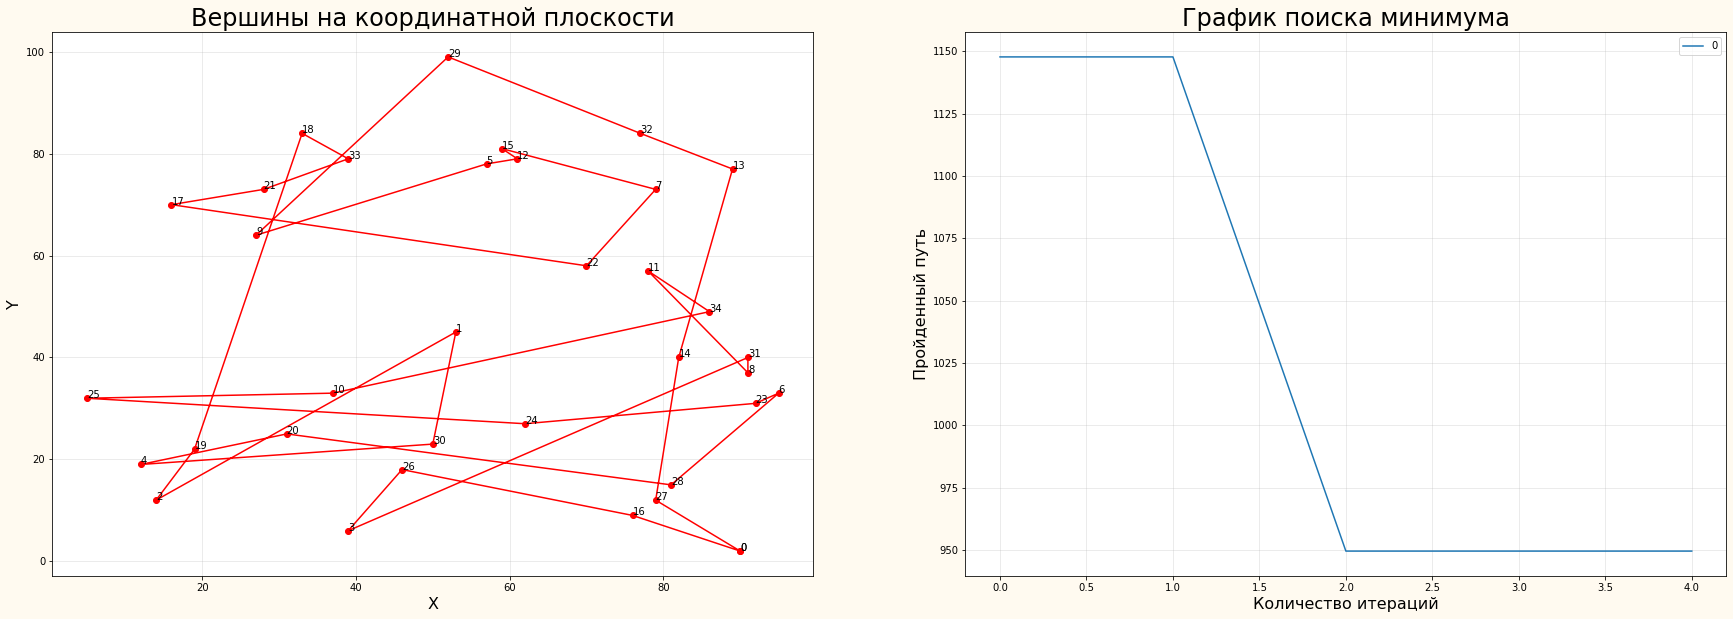



 Итерация №6
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1341.07364677 1171.37638363 1220.90981626 1345.02193716 1399.09927733]


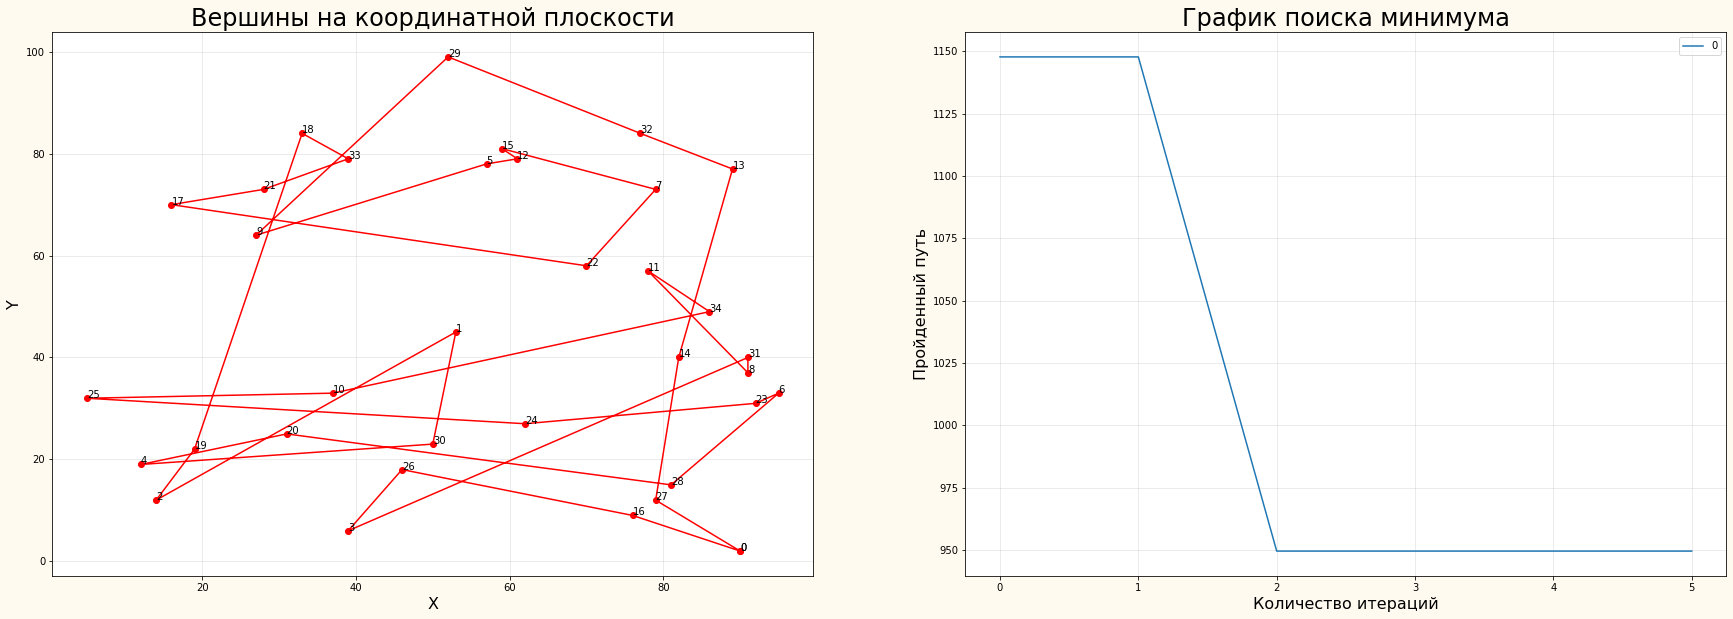



 Итерация №7
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1152.93517086 1224.41200156 1354.38363221 1580.21109586 1159.52994953]


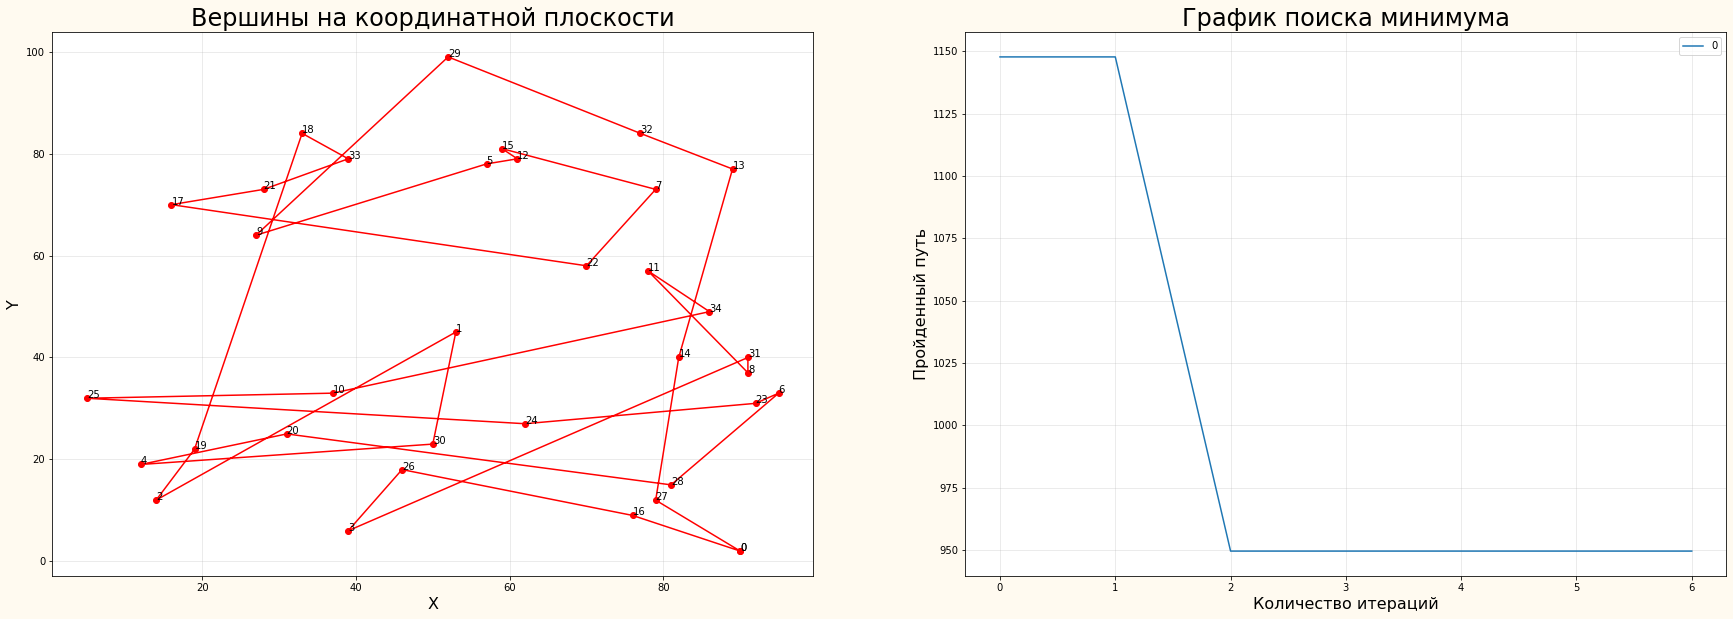



 Итерация №8
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1299.77507725 1304.86449414 1390.10440656 1577.11681312 1289.88925161]


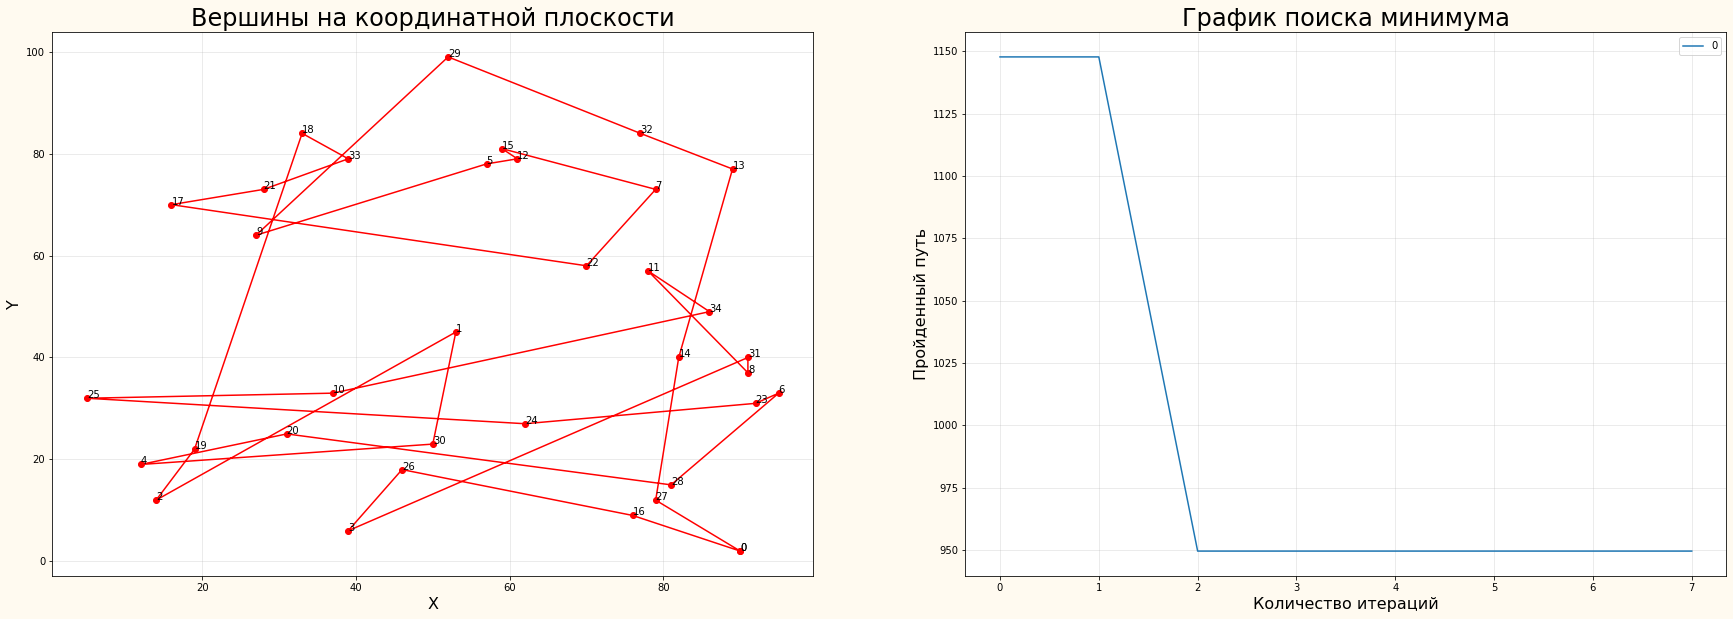



 Итерация №9
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1409.26678728 1267.98144266 1383.38427355 1121.65773703 1181.03612823]


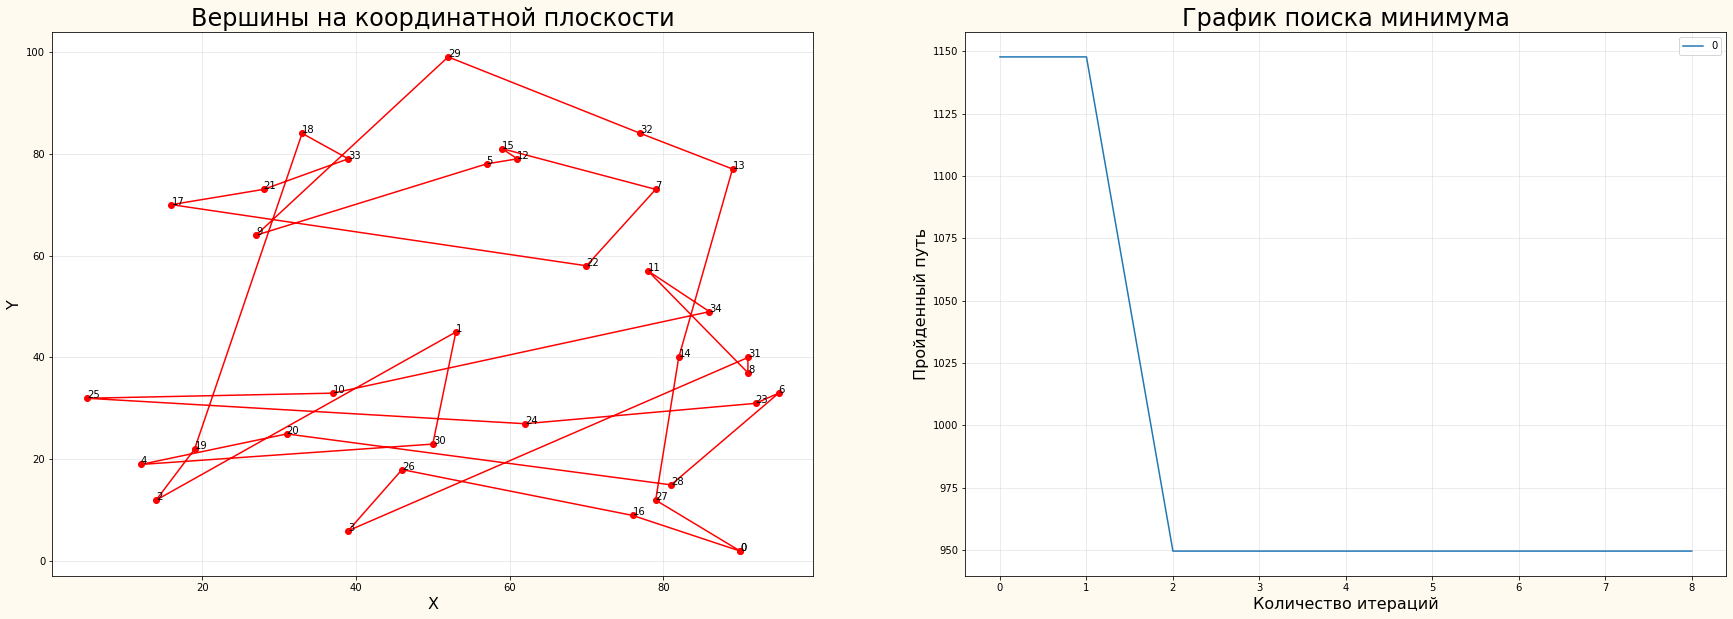



 Итерация №10
Полученный путь: -0-16-26-3-31-8-11-34-10-25-24-23-6-28-20-4-30-1-2-19-18-33-21-17-22-7-15-12-5-9-29-32-13-14-27-0
Стоимость: 949.6346414639289
[1345.38664847 1181.43318954 1258.90415702 1407.17735526 1406.48397877]


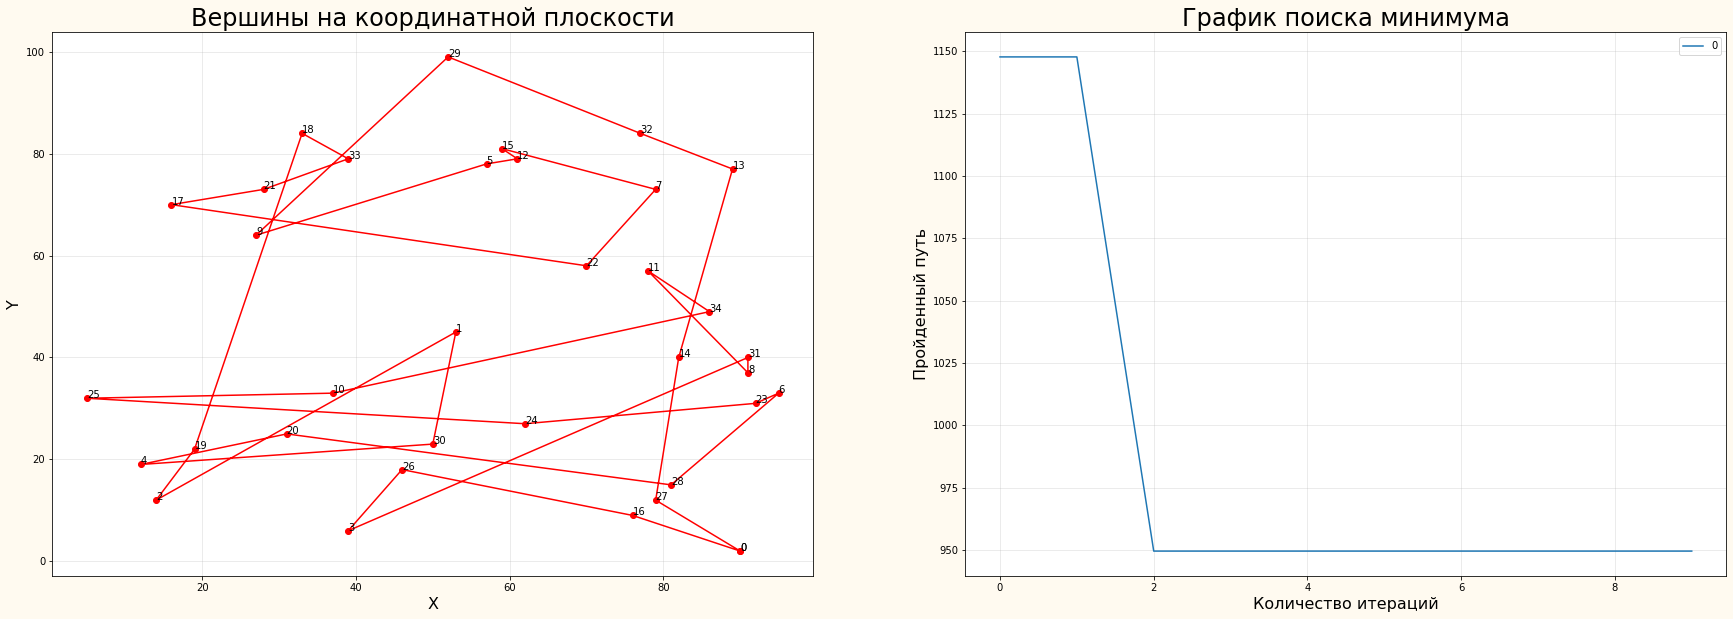

Время выполнения алгоритма: 3.6432645320892334 seconds


In [24]:
type_input =int(input("Выберите способ ввода данных:\n1)Ввод с клавиатуры.\n2)Случайная генерация\n3)Считывание из CSV-файла координатных точек\n"))

if type_input == 1:
    num_points = int(input("Введите количество вершин (Количество вершин >= 3 и <= 10 для ввода в ручную):\n "))
    list_vertex = []
    print('''
    ВАЖНО! 
    для ввода чисел:
    Разделитель десятичного числа - точка!
    Разделитель точек - запятая!
    Ввод чисел через запятую.
    ''')
    while (len(list_vertex)+1) <= num_points:
      list_xy = input('Введите точки вершины №{} x и y на координатной плоскости:'.format(len(list_vertex)+1))
      list_xy = list_xy.split(',')
      for i in range(len(list_xy)):
          list_xy[i] = float(list_xy[i])
      list_vertex.append(list(list_xy))
    points_coordinate = np.array(list_vertex)
    print("Координаты вершин:\n ", points_coordinate)
    distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
    df_matrix = pd.DataFrame(distance_matrix)

elif type_input == 2:
    num_points = np.random.randint(5, 100) # количество вершин
    points_coordinate = np.array(np.random.randint(1, 100, size=(num_points, 2)))  # генерация рандомных вершин
    print("Сгенерировано {num_points} вершин.\nКоординаты вершин:\n {points_coordinate}".format(num_points = num_points, points_coordinate = points_coordinate))
    distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
    df_matrix = pd.DataFrame(distance_matrix)
    # вычисление матрицы расстояний между вершин
    print("Матрица весовых коэффициентов:\n ", df_matrix)
    
elif type_input == 3:
    csv = input("Укажите путь к файлу (слэш с наклоном вправо):\n")
    df = pd.read_csv(csv, sep=';', decimal = ',')
    length, width = df.shape[0], df.shape[1]
    num_points = length
    i = 0
    list_vertex = []
    while i!=length:
        j = list(df.loc[i])
        list_vertex.append(j[1:])
        i+=1
    print('Количество вершин = {}'.format(num_points))
    points_coordinate = np.array(list_vertex)
    distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')    
    df_matrix = pd.DataFrame(distance_matrix)
    # вычисление матрицы расстояний между вершин
    print("Матрица весовых коэффициентов:\n ", df_matrix)  

ants = int(input("Введите количество муравьев:\n "))
iteration = int(input("Введите количество итераций:\n "))

print(distance_matrix)
# вычисление длины пути
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

def main():
    # создание объекта алгоритма муравьиной колонии
    aca = ACO_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=ants,  # количество муравьёв
                  max_iter=iteration, distance_matrix=distance_matrix)
    aca.run()

if __name__ == "__main__":
    start_time = time.time() # сохранение времени начала выполнения
    main() # выполнение кода
    print("Время выполнения алгоритма: %s seconds" %abs (time.time() - start_time)) # вычисление времени выполнения

## 